# Import Library and packages

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


import pylab as pl
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# Data loading

In [7]:
df_dept = pd.read_csv('./departments.csv')
df_ord = pd.read_csv('./orders.csv')
df_ord_prod =pd.read_csv('./order_products__prior.csv')
df_aisles = pd.read_csv('./aisles.csv')
df_prod = pd.read_csv('./products.csv')

In [91]:
df_hod = pd.read_csv('./hod_sales_count.csv')

In [92]:
df_hod.head()

,order_hour_of_day,count
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527


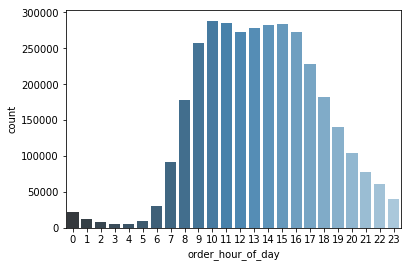

In [93]:
# df_hod.plot(kind ='bar',figsize=(10,8), )
sns.barplot(x=df_hod['order_hour_of_day'],y =df_hod['count'], color ='b',palette="Blues_d")

In [94]:
df_ord_freq = pd.read_csv('./ord_freq.csv')

In [95]:
df_ord_freq.head()

,ord_freq,count
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696


In [3]:
# df_ord_freq.plot(kind ='bar',x=df_ord_freq['ord_freq'],y =df_ord_freq['count'],figsize=(15,12) )
df_ord_freq.plot(kind ='bar',figsize=(15,12),colormap ='BrBG' )

NameError: name 'df_ord_freq' is not defined

In [63]:
df_aisle = pd.read_csv('./ailse_sales_count.csv')

In [81]:
df_aisle[['count','aisles']].sort_values(by ='count' ,ascending =False).head(20).values

array([[1862949, 'fresh fruits'],
       [1486803, 'fresh vegetables'],
       [1229500, 'packaged vegetables fruits'],
       [880330, 'yogurt'],
       [815345, 'milk'],
       [769098, 'packaged cheese'],
       [641024, 'water seltzer sparkling water'],
       [568087, 'soy lactosefree'],
       [561234, 'chips pretzels'],
       [548617, 'bread'],
       [459758, 'eggs'],
       [447010, 'refrigerated'],
       [412577, 'frozen produce'],
       [384247, 'crackers'],
       [368635, 'ice cream ice'],
       [348399, 'lunch meat'],
       [328344, 'fresh dips tapenades'],
       [313074, 'fresh herbs'],
       [310156, 'cereal'],
       [306461, 'cream']], dtype=object)

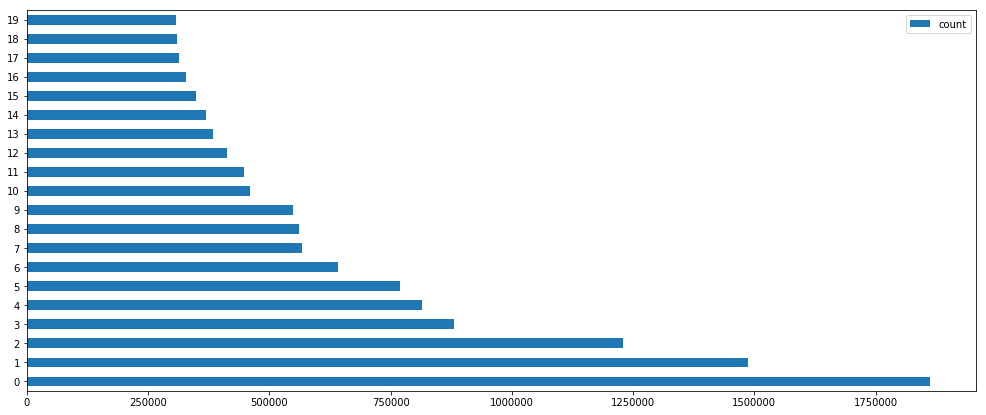

In [86]:
df_aisle[['aisles','count']].sort_values(by ='count',ascending =False).head(20).plot(kind ='barh',figsize=(17,7) )
df_hod

In [11]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [12]:
df_ord_prod.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
dict([(1, 2)])

{1: 2}

In [15]:
ls_ord_prod =[]
df =df_ord_prod[df_ord_prod['order_id'] ==121]
for x  in df.order_id.unique():
    ls_prd =[]
    y =df[df['order_id'] ==x]
    z = y.shape[0]
    for i in range(0, z):
        result = y.values[i,1]
        ls_prd.append(result)
    ls_ord_prod.append(ls_prd)
    print(x)
    ls_dict =dict([(x ,ls_ord_prod[0])])    

121


In [53]:
ls_dict


{121: [42493, 13372, 3696, 48532, 38579]}

In [54]:
df2 =pd.DataFrame(ls_dict)

In [55]:
df2

,121
0,42493
1,13372
2,3696
3,48532
4,38579


In [28]:
my_set = {1,2,3,4,3,2}
print(my_set)

{1, 2, 3, 4}


In [25]:
df

,order_id,product_id,add_to_cart_order,reordered
1088,121,42493,1,1
1089,121,13372,2,0
1090,121,3696,3,1
1091,121,48532,4,1
1092,121,38579,5,1


In [16]:
df1 =df_ord[df_ord['user_id'] ==150]
df1['order_dow']

2237    6
2238    1
2239    4
2240    2
2241    5
2242    2
2243    2
2244    5
2245    2
2246    2
2247    0
2248    5
2249    3
2250    4
2251    0
2252    0
2253    6
2254    5
2255    1
2256    1
2257    4
2258    4
2259    6
2260    4
2261    3
2262    5
2263    4
2264    6
2265    1
2266    1
2267    0
2268    6
Name: order_dow, dtype: int64

In [82]:
df1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2237,3139566,150,prior,1,6,6,NaN
2238,242667,150,prior,2,1,6,9.0
2239,2789394,150,prior,3,4,18,10.0
2240,309416,150,prior,4,2,17,12.0
2241,3123164,150,prior,5,5,18,10.0


In [17]:
all_words =df1['order_dow'].values

In [69]:
# from gensim.models import Word2Vec

# word2vec = Word2Vec(all_words, min_count=2) 

In [18]:
df_merge = pd.merge(df_ord_prod,df_prod,on='product_id')

In [19]:
df_merge.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [20]:
df_merge1 = pd.merge(df1,df_merge,how ='inner',on='order_id')

In [21]:
df_merge1.shape

(288, 13)

In [24]:
df_merge1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,3139566,150,prior,1,6,6,NaN,28199,12,0,"Clementines, Bag",123,4
1,3139566,150,prior,1,6,6,NaN,16953,8,0,Creamy Peanut Butter,88,13
2,3139566,150,prior,1,6,6,NaN,20776,3,0,Organic Quinoa,63,9
3,3139566,150,prior,1,6,6,NaN,20378,13,0,Chicken Broth,69,15
4,3139566,150,prior,1,6,6,NaN,3298,7,0,Mozzarella String Cheese,21,16
5,3139566,150,prior,1,6,6,NaN,36393,9,0,Eggo Buttermilk Waffles,52,1
6,3139566,150,prior,1,6,6,NaN,3431,1,0,Squeezed Lemonade,64,7
7,3139566,150,prior,1,6,6,NaN,12845,10,0,Chopped Walnuts,117,19
8,3139566,150,prior,1,6,6,NaN,43719,11,0,Large Grade A - CA,86,16
9,3139566,150,prior,1,6,6,NaN,4916,6,0,Disney Frozen Berry Cherry Raspberry Ice Pops,37,1


In [9]:
# df_svg  = pd.read_csv('./user_avg_ord.csv')
df_svg  = pd.read_csv('./avg_cluster1.csv')

In [10]:
df_svg.head()

,user_id,avg_dow,avg_h_day,prod_count,avg_freq,re_ord_ratio
0,1,2.50,10.30,5.90,19.56,0.71
1,2,2.14,10.57,13.93,15.23,0.45
2,5,1.75,16.00,9.25,13.33,0.38
3,7,1.85,13.60,10.30,10.68,0.75
4,8,4.00,2.67,16.33,30.00,0.30


In [11]:
X = np.array(df_svg)

In [19]:
X

array([[1.00000e+00, 2.50000e+00, 1.03000e+01, 5.90000e+00, 1.95600e+01,
        7.10000e-01],
       [2.00000e+00, 2.14000e+00, 1.05700e+01, 1.39300e+01, 1.52300e+01,
        4.50000e-01],
       [5.00000e+00, 1.75000e+00, 1.60000e+01, 9.25000e+00, 1.33300e+01,
        3.80000e-01],
       ...,
       [2.06203e+05, 1.80000e+00, 1.56000e+01, 2.38000e+01, 2.92500e+01,
        3.00000e-01],
       [2.06205e+05, 3.67000e+00, 1.43300e+01, 1.06700e+01, 2.00000e+01,
        3.70000e-01],
       [2.06209e+05, 2.77000e+00, 1.36200e+01, 9.92000e+00, 1.75000e+01,
        5.40000e-01]])

In [ ]:
kmeans = KMeans(n_clusters =20)

In [ ]:
y =kmeans.fit(X)

In [ ]:
z =y.predict(X)

In [ ]:
m =np.array(z)

In [ ]:
 ls =m.tolist()

In [ ]:
# df_m = pd.DataFrame(m, columns =['cla'])
df_svg['class'] =ls

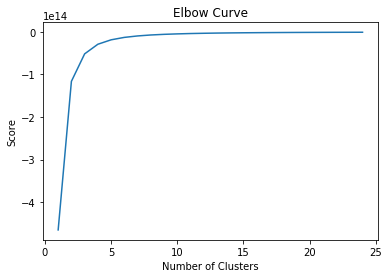

In [22]:
Nc = range(1, 25)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

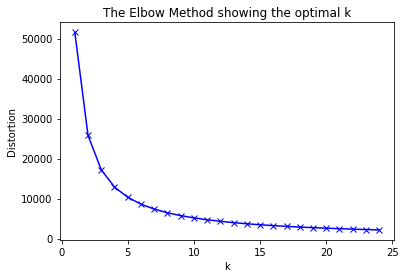

In [24]:
distortions = []
K = range(1, 25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
kmeans_5 = KMeans(n_clusters =5)
y_5 =kmeans_5.fit(X)             
labels_5 = y_5.labels_

In [13]:
labels_5

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

In [14]:
m =np.array(labels_5)
ls =m.tolist()

In [15]:
df_svg['class'] =ls

In [16]:
df_svg.head()

,user_id,avg_dow,avg_h_day,prod_count,avg_freq,re_ord_ratio,class
0,1,2.50,10.30,5.90,19.56,0.71,2
1,2,2.14,10.57,13.93,15.23,0.45,2
2,5,1.75,16.00,9.25,13.33,0.38,2
3,7,1.85,13.60,10.30,10.68,0.75,2
4,8,4.00,2.67,16.33,30.00,0.30,2


In [5]:
df_dept = pd.read_csv('./departments.csv')
df_ord = pd.read_csv('./orders.csv')
df_ord_prod =pd.read_csv('./order_products__prior.csv')
df_aisles = pd.read_csv('./aisles.csv')
df_prod 

NameError: name 'pd' is not defined

In [17]:
df_merge = pd.merge(df_ord_prod,df_prod,on='product_id')

In [18]:
df_merge1 = pd.merge(df_ord,df_svg,on='user_id')

In [19]:
df_merge2 =pd.merge(df_merge,df_merge1,on='order_id')

In [20]:
df_merge2.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,avg_dow,avg_h_day,prod_count,avg_freq,re_ord_ratio,class
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,4.25,11.38,11.25,21.57,0.48,4
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,4.25,11.38,11.25,21.57,0.48,4
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,4.25,11.38,11.25,21.57,0.48,4
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,4.25,11.38,11.25,21.57,0.48,4
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,4.25,11.38,11.25,21.57,0.48,4


In [21]:
cl1 =df_merge2[df_merge2['class'] ==1]
cl2 =df_merge2[df_merge2['class'] ==2]
cl3 =df_merge2[df_merge2['class'] ==3]
cl4 =df_merge2[df_merge2['class'] ==4]
cl5 =df_merge2[df_merge2['class'] ==0]

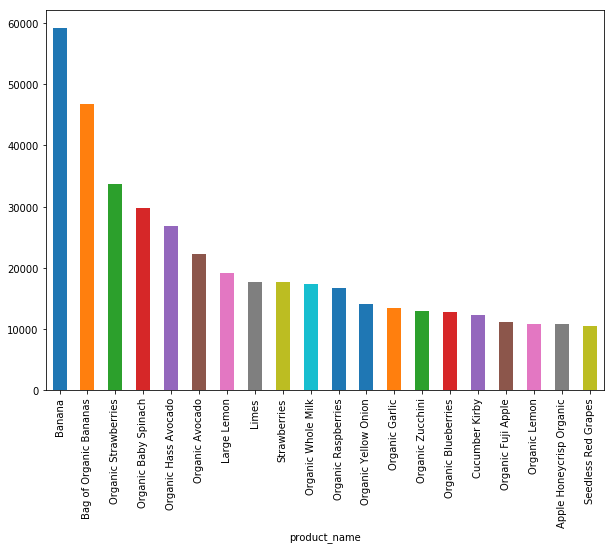

In [22]:
# cl1.groupby
cl1.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(10,7) )
# s.sort_values(ascending=True)

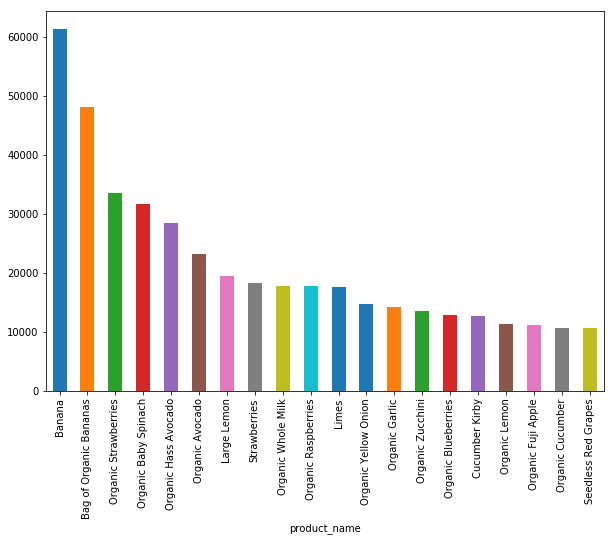

In [23]:
cl2.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(10,7) )

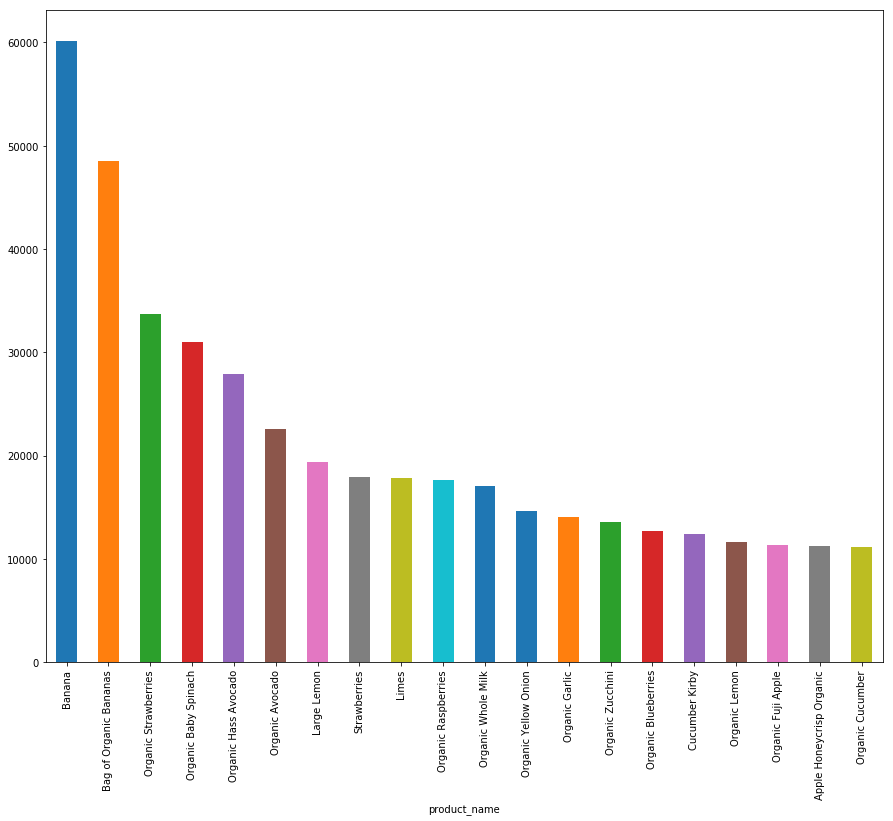

In [48]:
cl3.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(15,12) )

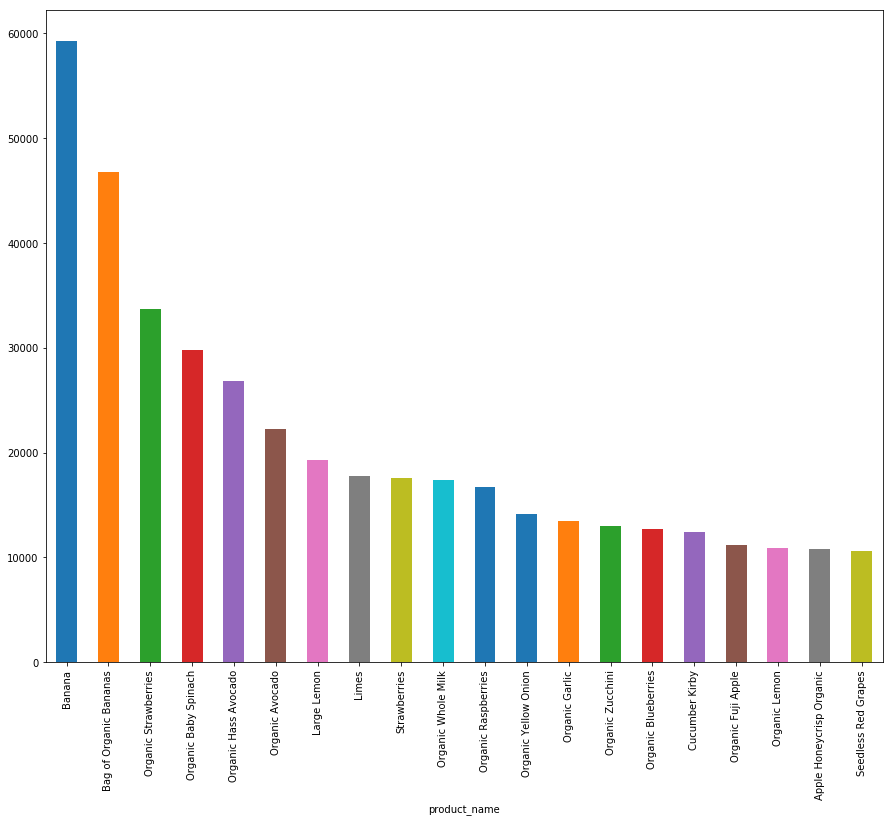

In [47]:
cl4.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(15,12) )

In [43]:
cl5 =df_merge2[df_merge2['class'] ==0]

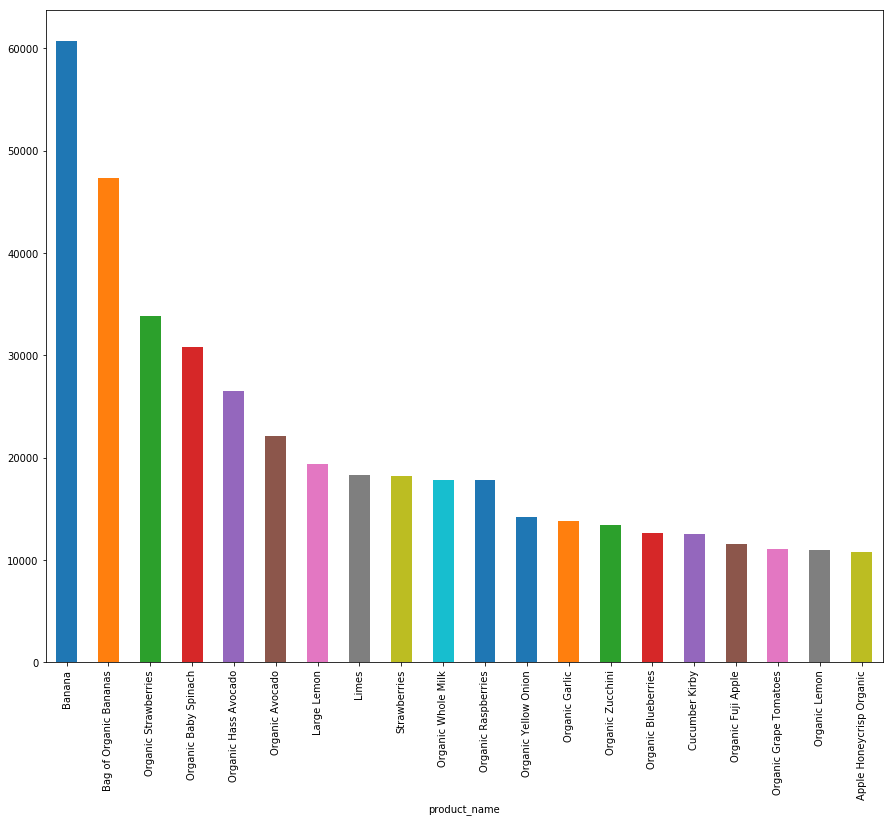

In [46]:
cl5.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(15,12) )

In [24]:
kmeans_3 = KMeans(n_clusters =3)
y_3 =kmeans_3.fit(X)             
labels_3 = y_3.labels_

In [25]:
m3 =np.array(labels_3)
ls3 =m.tolist()

In [26]:
df_svg['class3'] =ls3

In [27]:
df_merge1 = pd.merge(df_ord,df_svg,on='user_id')
df_merge2 =pd.merge(df_merge,df_merge1,on='order_id')

In [28]:
cl3_1 =df_merge2[df_merge2['class3'] ==1]
cl3_2 =df_merge2[df_merge2['class3'] ==2]
cl3_3 =df_merge2[df_merge2['class3'] ==0]


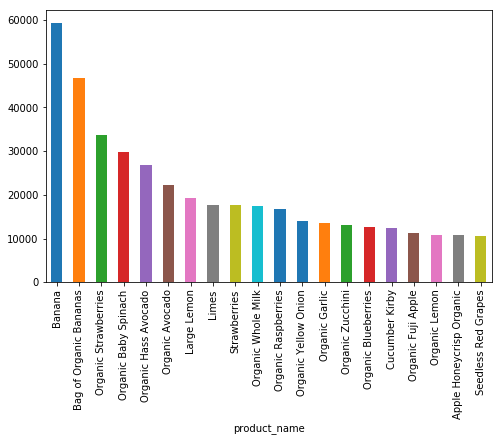

In [32]:
cl3_1.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(8,5) )

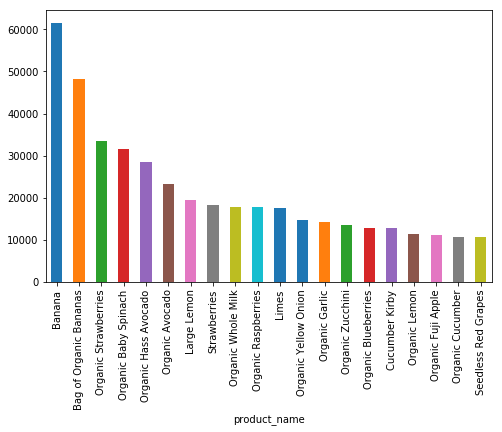

In [33]:
cl3_2.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(8,5) )

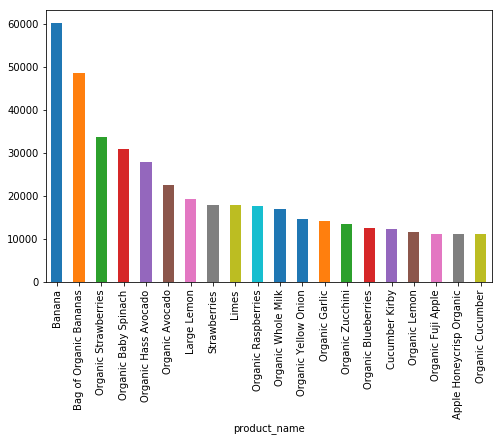

In [34]:
cl3_3.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(8,5) )